<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.583464,73.503998,91.954333,235.041795,147.862809,87.178986
1,0.0,1.0,83.735214,57.277040,380.275472,531.287727,175.221804,356.065923
2,0.0,2.0,58.188386,75.209457,202.658005,346.055848,147.463948,198.591900
3,0.0,3.0,95.348198,81.035533,141.190670,327.574400,236.920854,90.653547
4,0.0,4.0,28.158745,22.677545,-53.306046,7.530244,1.614230,5.916015
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.334712,99.515472,-189.137889,-23.287705,96.694440,-119.982144
119996,999.0,116.0,24.078840,24.497634,-13.599826,44.976648,99.056374,-54.079726
119997,999.0,117.0,98.215050,32.290414,-0.168093,140.337371,106.692034,33.645337
119998,999.0,118.0,88.059577,37.520379,-59.120749,76.459208,105.146324,-28.687116


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.583464,73.503998,91.954333,235.041795,147.862809,87.178986
1,0.0,1.0,83.735214,57.277040,380.275472,531.287727,175.221804,356.065923
2,0.0,2.0,58.188386,75.209457,202.658005,346.055848,147.463948,198.591900
3,0.0,3.0,95.348198,81.035533,141.190670,327.574400,236.920854,90.653547
4,0.0,4.0,28.158745,22.677545,-53.306046,7.530244,1.614230,5.916015
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.334712,99.515472,-189.137889,-23.287705,96.694440,-119.982144
119996,999.0,116.0,24.078840,24.497634,-13.599826,44.976648,99.056374,-54.079726
119997,999.0,117.0,98.215050,32.290414,-0.168093,140.337371,106.692034,33.645337
119998,999.0,118.0,88.059577,37.520379,-59.120749,76.459208,105.146324,-28.687116


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    59.583464  73.503998   91.954333  235.041795  147.862809   
      1.0    83.735214  57.277040  380.275472  531.287727  175.221804   
      2.0    58.188386  75.209457  202.658005  346.055848  147.463948   
      3.0    95.348198  81.035533  141.190670  327.574400  236.920854   
      4.0    28.158745  22.677545  -53.306046    7.530244    1.614230   
...                ...        ...         ...         ...         ...   
999.0 115.0  56.334712  99.515472 -189.137889  -23.287705   96.694440   
      116.0  24.078840  24.497634  -13.599826   44.976648   99.056374   
      117.0  98.215050  32.290414   -0.168093  140.337371  106.692034   
      118.0  88.059577  37.520379  -59.120749   76.459208  105.146324   
      119.0  46.510840  71.175456  161.955564  289.641860   97.849663   

                  e_hat  
rep   index              
0.0   0.0     87.178986  
      1.0    356.065923  
      2.0    198.591900  
      3.0     90.653547  
      4.0      5.916015  
...                 ...  
999.0 115.0 -119.982144  
      116.0  -54.079726  
      117.0   33.645337  
      118.0  -28.687116  
      119.0  191.792197  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    59.583464  73.503998   91.954333  235.041795  147.862809   
      1.0    83.735214  57.277040  380.275472  531.287727  175.221804   
      2.0    58.188386  75.209457  202.658005  346.055848  147.463948   
      3.0    95.348198  81.035533  141.190670  327.574400  236.920854   
      4.0    28.158745  22.677545  -53.306046    7.530244    1.614230   
...                ...        ...         ...         ...         ...   
999.0 115.0  56.334712  99.515472 -189.137889  -23.287705   96.694440   
      116.0  24.078840  24.497634  -13.599826   44.976648   99.056374   
      117.0  98.215050  32.290414   -0.168093  140.337371  106.692034   
      118.0  88.059577  37.520379  -59.120749   76.459208  105.146324   
      119.0  46.510840  71.175456  161.955564  289.641860   97.849663   

                  e_hat  
rep   index              
0.0   0.0     87.178986  
      1.0    356.065923  
      2.0    198.591900  
      3.0     90.653547  
      4.0      5.916015  
...                 ...  
999.0 115.0 -119.982144  
      116.0  -54.079726  
      117.0   33.645337  
      118.0  -28.687116  
      119.0  191.792197  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.583464,73.503998,91.954333,235.041795,147.862809,87.178986
1,0.0,1.0,83.735214,57.277040,380.275472,531.287727,175.221804,356.065923
2,0.0,2.0,58.188386,75.209457,202.658005,346.055848,147.463948,198.591900
3,0.0,3.0,95.348198,81.035533,141.190670,327.574400,236.920854,90.653547
4,0.0,4.0,28.158745,22.677545,-53.306046,7.530244,1.614230,5.916015
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.334712,99.515472,-189.137889,-23.287705,96.694440,-119.982144
119996,999.0,116.0,24.078840,24.497634,-13.599826,44.976648,99.056374,-54.079726
119997,999.0,117.0,98.215050,32.290414,-0.168093,140.337371,106.692034,33.645337
119998,999.0,118.0,88.059577,37.520379,-59.120749,76.459208,105.146324,-28.687116


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    59.583464  73.503998   91.954333  235.041795  147.862809   
      1.0    83.735214  57.277040  380.275472  531.287727  175.221804   
      2.0    58.188386  75.209457  202.658005  346.055848  147.463948   
      3.0    95.348198  81.035533  141.190670  327.574400  236.920854   
      4.0    28.158745  22.677545  -53.306046    7.530244    1.614230   
...                ...        ...         ...         ...         ...   
999.0 115.0  56.334712  99.515472 -189.137889  -23.287705   96.694440   
      116.0  24.078840  24.497634  -13.599826   44.976648   99.056374   
      117.0  98.215050  32.290414   -0.168093  140.337371  106.692034   
      118.0  88.059577  37.520379  -59.120749   76.459208  105.146324   
      119.0  46.510840  71.175456  161.955564  289.641860   97.849663   

                  e_hat  
rep   index              
0.0   0.0     87.178986  
      1.0    356.065923  
      2.0    198.591900  
      3.0     90.653547  
      4.0      5.916015  
...                 ...  
999.0 115.0 -119.982144  
      116.0  -54.079726  
      117.0   33.645337  
      118.0  -28.687116  
      119.0  191.792197  

[120000 rows x 6 columns]

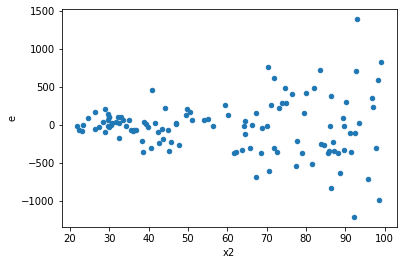

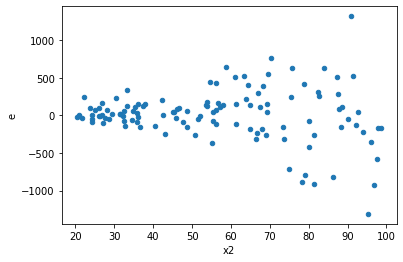

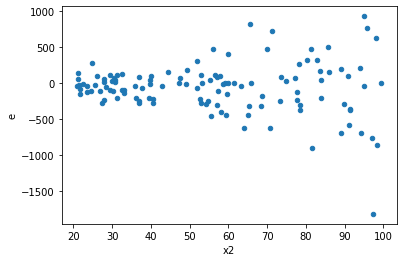

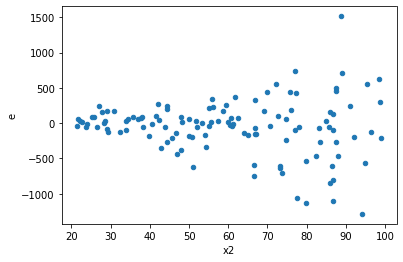

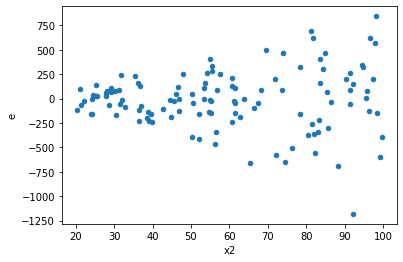

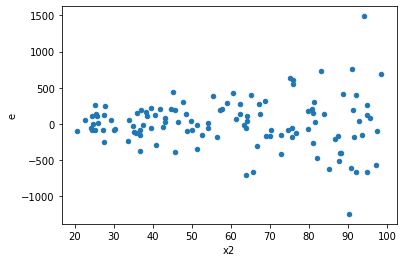

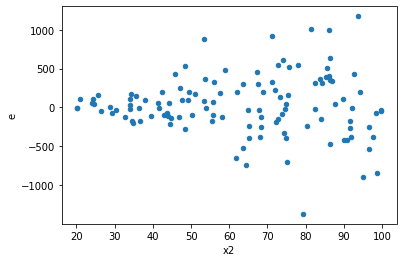

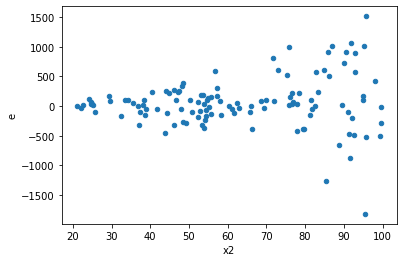

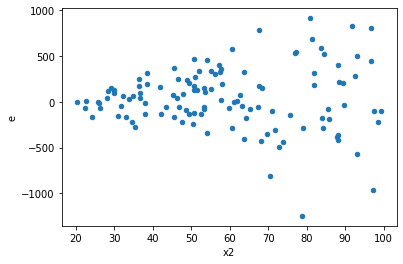

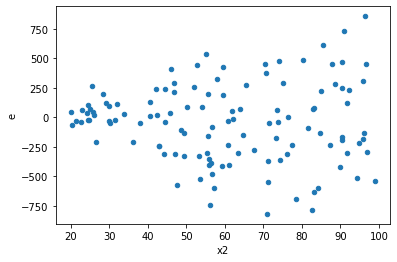

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,4783125.248206448,5750572.204898063,103980.9836566619,125012.43923691442,1.2022625180167263,0.5346990779789214,0.7326504610105393,0.2673495389894607,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,5388383.743141065,6289473.822940286,117138.77702480576,136727.6918030497,1.1672282678356434,0.6021700397265586,0.6989149801367207,0.3010850198632793,Reject005=1 : Homoscedasticity
4.0,46.0,46.0,622607.6080756523,15187938.395085044,13534.948001644614,330172.5738061966,24.394077743488765,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,3029019.8097975235,6319599.816249095,65848.25673472877,137382.6047010673,2.0863514315119427,0.01415034299316864,0.9929248285034157,0.00707517149658432,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,1129749.3408454459,10940817.033820048,24559.768279248823,237843.84856130538,9.684287158452783,2.2819524048145468e-12,0.999999999998859,1.1409762024072734e-12,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,5348987.958748173,6886163.1112633385,116282.34692930811,149699.19807094213,1.2873768205069789,0.39484382999044465,0.8025780850047777,0.19742191499522233,Reject005=1 : Homoscedasticity
9.0,46.0,46.0,1686455.6388476714,9715595.38906533,36662.07910538416,211208.59541446372,5.760955204077496,2.3448964325822885e-08,0.9999999882755178,1.1724482162911443e-08,Reject005=0 : Heteroscedasticity
10.0,46.0,46.0,5051372.367715767,5793589.158015236,109812.44277642971,125947.59039163557,1.1469336917315998,0.6439363025352054,0.6780318487323973,0.3219681512676027,Reject005=1 : Homoscedasticity
14.0,46.0,46.0,2579968.37816896,6829142.341014805,56086.26909062957,148459.61610901752,2.6469868385989845,0.0012733813627889834,0.9993633093186055,0.0006366906813944917,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,4783125.248206448,5750572.204898063,103980.9836566619,125012.43923691442,1.2022625180167263,0.5346990779789214,Reject005=1 : Homoscedasticity
1.0,46.0,46.0,5388383.743141065,6289473.822940286,117138.77702480576,136727.6918030497,1.1672282678356434,0.6021700397265586,Reject005=1 : Homoscedasticity
2.0,46.0,46.0,7289791.718297116,5373503.908382536,158473.73300645905,116815.30235614209,0.7371272206440732,0.304557086824967,Reject005=1 : Homoscedasticity
3.0,46.0,46.0,7695288.0208647465,5503145.375432666,167288.87001879883,119633.59511810144,0.7151318261917712,0.2592191812410564,Reject005=1 : Homoscedasticity
4.0,46.0,46.0,622607.6080756523,15187938.395085044,13534.948001644614,330172.5738061966,24.394077743488765,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,3029019.8097975235,6319599.816249095,65848.25673472877,137382.6047010673,2.0863514315119427,0.01415034299316864,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,9716317.624760568,4065740.8506461927,211224.29619044714,88385.67066622157,0.4184446214773039,0.0038028043268653763,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,1129749.3408454459,10940817.033820048,24559.768279248823,237843.84856130538,9.684287158452783,2.2819524048145468e-12,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,5348987.958748173,6886163.1112633385,116282.34692930811,149699.19807094213,1.2873768205069789,0.39484382999044465,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    761
Reject005=1 : Homoscedasticity      239
Name: Result_test, dtype: int64